# 1 - Business Opportunity

## The Project Objective

AAVAIL aims to transition from a tiered subscription model to an à la carte service model based on user feedback and evolving market demands, especially in international markets.   
In order to achieve this, the company seeks to develop a revenue projection tool that can accurately predict monthly revenue for specific countries using a machine learning model.     
This tool is crucial for the management team, who currently rely on manual methods to estimate revenue and face challenges with accuracy and efficiency.    
By automating revenue predictions, AAVAIL hopes to streamline decision-making processes, stabilize staffing and budget projections, and ultimately enhance business performance.

## The Stakeholders

Two primary groups have been involved in the design thinking process:

- `End Users`: AAVAIL customers who will benefit from the new subscription model.
- `Managers`: AAVAIL responsibles for revenue projections and who have expressed a need for a more effective forecasting tool.


## The Ideal Data

To effectively address the business opportunity, the following data points would be ideal:

**Transaction-Level Data:**
- `Date`: The date of each transaction to analyze revenue trends over time.
- `Invoice ID`: A unique identifier for each transaction, stripped of non-numeric characters for consistency.
- `Service Type`: The specific service subscribed to, allowing for differentiation between offerings.
- `Times viewed` : The number of times a particular content or service was viewed by the customer, providing insights into engagement levels.
- `Transaction Amount`: The revenue generated from each transaction to calculate total revenue.

**User Data:**                            
- `User ID`: A unique identifier for each user to track their purchasing behavior.
- `Subscription Type`: Details about whether users are on à la carte or tiered subscriptions.
- `User Demographics`: Age, gender, and other demographics to analyze trends in purchasing behavior.

**Country Data**
- `Country`: The country of each user to analyze revenue generation across different markets.
- `City` : The city of each user to analyze revenue generation across different local markets.
- `GDP per Capita` : The total economic output of the country, often used as a measure of economic health and consumer spending potential.
- `Currency Exchange Rates` : The current value of the country's currency relative to other major currencies, particularly USD or EUR, which could affect subscription pricing.
- `Holidays and Seasonal Trends`: National holidays or cultural events that could impact subscription patterns or usage trends.


## The Available Data 

There is a dataset consisting of transaction-level purchases from several thousand active users across 38 countries, providing valuable historical data. The fields of this dataset are as follow :

- `date` : The date in which the data was recorded, indicating when the transactions occurred.
- `country` : The country where the transaction took place, providing geographical context for the sales data.
- `invoice` : A unique identifier for each transaction or purchase, enabling tracking of individual sales.
- `customer_id` : A unique identifier for each customer, allowing for tracking and analysis of customer behavior and purchase patterns.
- `stream_id` : An identifier for the content or service that was accessed or purchased, indicating the source of the transaction.
- `times_viewed` : The number of times a particular content or service was viewed by the customer, providing insights into engagement levels.
- `price` : The monetary amount charged for the transaction, reflecting the revenue generated from each sale.

This dataset was supplied by the company as multiple `JSON` files, each representing a month of the year. 

Each file contains a `list of dictionaries` featuring the specified key fields mentioned above and historical data values spanning `from November 2017 to July 2019`.

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

# 2 - Data Ingestion

In this section, we are creating a python script to `extract the relevant data` from multiple data sources, automating the process of data ingestion.
From within a Python module the function `XXX` reads in the data, attempts to catch common input errors and returns a feature matrix that will subsequently be used as a starting point for the EDA and the modeling.

In [68]:
## Import necessary librairies 

from ingestion_module import load_json_data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


print('\nNecessary librairies imported\n')



Necessary librairies imported



In [2]:
## loading the dataframe as loaded_df

loaded_df = load_json_data('cs-train')

print("\n... Dataframe loaded as 'loaded_df'\n")


... Dataframe loaded as 'loaded_df'



## A - Basic Data Exploratory  

In [3]:
## Check for Duplicate rows in loaded_df

duplicate_rows = loaded_df.duplicated(keep="first")
total_duplicates = duplicate_rows.sum()
print(f"\nWarning: There are {total_duplicates} duplicate rows\n")


In [4]:
# Create a deep copy of the loaded_df named loaded_df_original

loaded_df_original = loaded_df.copy()  

print("\nA deep copy of loaded_df named loaded_df_original has been created'\n")


A deep copy of loaded_df named loaded_df_original has been created'



In [5]:
# Remove the duplicate rows in loaded_df

print("\nDuplicated Summary\n{}".format("-"*22))
size_before = len(loaded_df)
loaded_df.drop_duplicates(keep="first", inplace=True )
size_after = len(loaded_df)
print("... removed {} duplicate rows in the loaded_df\n".format(size_before-size_after))


Duplicated Summary
----------------------
... removed 28844 duplicate rows in the loaded_df



In [6]:
## Check for Missing Values in loaded_df

missing_values = loaded_df.isnull().sum()
if missing_values.sum() > 0:
    print("\nWarning: There are some missing values in the dataframe")
    print("\nMissing_values Summary\n{}".format("-"*25))
else :
    print("\nThere are no missing values in the dataframe")
    
# Filter for columns with missing values
missing_data = missing_values[missing_values > 0]

# Print the column name and number of missing values
for column, missing_count in missing_data.items():
    print(f"There are {missing_count} missing values in the {column} column\n")



Missing_values Summary
-------------------------
There are 182194 missing values in the customer_id column



In [86]:
## Check for uniqueness of entries in each column of loaded_df

print("\nUniqueness of entries in each column\n{}".format("-"*39))
for column in ['country','date','invoice_id','customer_id','stream_id'] :
    num_unique = loaded_df[column].nunique()           # Total unique values in the column
    
    print(f"There are {num_unique} unique {column}")



Uniqueness of entries in each column
---------------------------------------
There are 43 unique country
There are 495 unique date
There are 42646 unique invoice_id
There are 5225 unique customer_id
There are 5007 unique stream_id


## B - Dates investigation

In [88]:
## Dates Span and Missing Observations

max_date = loaded_df.date.max()
min_date = loaded_df.date.min()

span_dates = (max_date -  min_date).days + 1
nunique_dates = loaded_df.date.nunique()
missing_observations = span_dates - nunique_dates


print(f'\nAs highlighted above, there are {nunique_dates} unique date, but the dates span a range of {span_dates} days \
- starting the {min_date} and ending the {max_date} - giving us {missing_observations} missing observations.\n')



As highlighted above, there are 495 unique date, but the dates span a range of 611 days - starting the 2017-11-28 and ending the 2019-07-31 - giving us `116` missing observations.



## C - Revenu investigation


The top five revenue-generating countries



,revenue,percentage
country,,
United Kingdom,"3,381,963.48",89.69%
EIRE,"106,223.37",2.82%
Germany,"48,356.79",1.28%
France,"39,665.39",1.05%
Norway,"38,336.38",1.02%



The revenue generated by United Kingdom is approximately 15.0 times greater than the combined revenue of the next four countries.



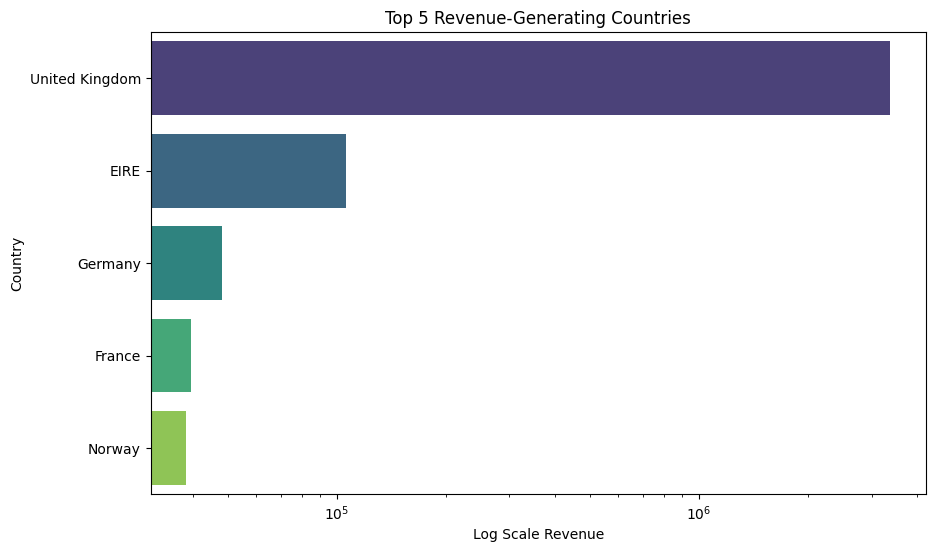

In [101]:
# Group by country and calculate the total revenue for each country
revenue_country = (loaded_df[['country', 'price']]
                   .groupby('country')
                   .sum()
                   .rename(columns={'price': 'revenue_'}))

# Calculate total revenue and percentage contribution for each country
total_revenue = revenue_country['revenue_'].sum()
revenue_country = revenue_country.assign( 
                                         percentage_=(revenue_country['revenue_'] / total_revenue) * 100
                                        )

# Sort by revenue in descending order and format for display
revenue_country = (revenue_country
                   .sort_values(by='revenue_', ascending=False)
                   .assign(revenue=lambda df: df['revenue_'].apply(lambda x: f"{x:,.2f}"),
                           percentage=lambda df: df['percentage_'].apply(lambda x: f"{x:.2f}%")
                          )
                  )

# Display the top five revenue-generating countries
print('\nThe top five revenue-generating countries\n')
display(revenue_country[['revenue', 'percentage']].head(5))

# Calculate the revenue ratio between the top country and the next four combined
revenue_ratio = (revenue_country['revenue_'].values[0] /
                 revenue_country['revenue_'].values[1:5].sum()).round(0)
print(f'\nThe revenue generated by {revenue_country.index[0]} is approximately '
      f'{revenue_ratio} times greater than the combined revenue of the next four countries.\n')

# Plot a horizontal bar chart for the top 5 revenue-generating countries
top_5_countries = revenue_country.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue_', y=top_5_countries.index.tolist(), data=revenue_country.head(5), palette='viridis')

# Set the x-axis to a logarithmic scale
plt.xscale('log')

# Add labels and title
plt.xlabel('Log Scale Revenue')
plt.ylabel('Country')
plt.title('Top 5 Revenue-Generating Countries')

# Display the plot
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------

# 3 - Testable Hypotheses

In order to derive meaningful insights from the dataset, we propose a series of testable hypotheses that explore the relationships between various factors influencing revenue generation. 
These hypotheses aim to identify key trends and patterns in user behavior, seasonal effects, and the effectiveness of different subscription models, ultimately guiding strategic decision-making for this business opportunity.

### Hypothesis 1: Revenue Prediction by Country

`Statement` : The monthly revenue from the top ten countries is significantly different from each other.

`Involved Fields` : country, price, year, month

`Target` : The Monthly Revenue which is the total revenue generated in a given month for each country.

`Business Metric` : The Revenue Variance Across Countries: The key business metric to be evaluated is whether the monthly revenue varies significantly across the top ten countries. This is critical for understanding market performance and tailoring the company's revenue generation strategies accordingly.

---------------------------------------------------------------------------------------------------------------------------------------------

`Data Aggregation`: Aggregate the data by country, year, and month to calculate the total monthly revenue for each country. This can be achieved by summing the price for each combination of country, year, and month.
The resulting dataset will have fields: country, year, month, and monthly_revenue.
Statistical Analysis:

`Statistical tests (e.g., ANOVA)` : To compare the monthly revenues across the top ten countries. This will help determine if there are statistically significant differences in revenue generation.
Calculate summary statistics (mean, median, variance) for monthly revenue in each country to assess overall performance and variability.
Visualization:

`Visualizations` : Depict the distribution of monthly revenue across the top ten countries. This will help in identifying outliers and trends visually.  
Time series plots can also be beneficial to show trends over time for each country, highlighting seasonal patterns or anomalies.
Correlation Analysis:

`Correlation Analysis`: Explore correlations between monthly revenue and other factors such as times_viewed, if applicable. This could provide insights into whether user engagement impacts revenue generation.

`Insights Extraction`:   
Based on the results of the statistical tests and visualizations, draw conclusions about the revenue generation capabilities of each country. Identify which countries are performing well and which are underperforming.
Assess whether external factors (e.g., economic conditions, cultural events) correlate with the observed revenue patterns, which could inform strategic decisions.


### Hypothesis 2: Impact of User Engagement on Revenue

`Statement`: Higher times viewed of a service correlates with increased revenue generated from that service.

``Involved Fields``: times_viewed, price, year, month, country

`Target` : The Monthly Revenue which is the total revenue generated in a given month for each country.

`Business Metric` : The Correlation Between User Engagement and Revenue: The key business metric to evaluate is the relationship between times_viewed and monthly revenue. Understanding this relationship is essential for optimizing marketing efforts and improving revenue generation strategies.

---------------------------------------------------------------------------------------------------------------------------------------------

`Data Aggregation`: Aggregate the data by country, year, month, and potentially by service type (if available) to calculate the total monthly revenue and total times viewed for each service.
The resulting dataset will have fields: country, year, month, total_times_viewed, and monthly_revenue.

`Statistical Analysis` : 
- Use correlation coefficients (e.g., Pearson or Spearman correlation) to quantify the relationship between total_times_viewed and monthly revenue. A positive correlation would indicate that higher views are associated with increased revenue.
- Conduct regression analysis (e.g., linear regression) to model the relationship between times_viewed and monthly revenue, controlling for other factors such as country, year, and month. This can provide insights into how much of the variance in revenue can be explained by user engagement.

`Visualizations`: Create scatter plots to visualize the relationship between total_times_viewed and monthly revenue. Adding a trend line can help illustrate any potential correlation.
Box plots can be useful to show the distribution of monthly revenue for different ranges of times_viewed, highlighting potential outliers and the central tendency.

`Insights Extraction`: Based on the results of the correlation and regression analyses, draw conclusions about the strength and nature of the relationship between user engagement (measured by times_viewed) and revenue generation.
Identify whether increasing user engagement strategies (like improved marketing or user experience) could potentially lead to higher revenues.

`Considerations`: It’s important to control for other confounding variables that might influence both times_viewed and monthly revenue. Factors such as seasonality, pricing changes, or marketing campaigns could be included in a multivariate analysis.

### Hypothesis 3: Seasonal Revenue Trends

`Statement`: Monthly revenue exhibits seasonal trends, indicating certain months generate higher revenue than others.

`Involved Fields`: year, month, price

`Target` : The Monthly Revenue which is the total revenue generated in a given month for each country.

`Business Metric` : Seasonal Revenue Trends: The key business metric to evaluate is whether monthly revenue varies significantly across different months of the year. Understanding these trends is vital for planning marketing efforts, budgeting, and staffing.

---------------------------------------------------------------------------------------------------------------------------------------------

`Data Aggregation`: Aggregate the data by year and month to calculate the total monthly revenue. This involves summing the price for all transactions that occur in that month for each year.
The resulting dataset will have fields: year, month, and monthly_revenue.

`Statistical Analysis` : 
- Perform a time series analysis to evaluate seasonal patterns in the monthly revenue data. This could involve using methods such as Seasonal Decomposition of Time Series (STL) to separate the seasonal component from the trend and residual components.
- Conduct ANOVA tests to determine if there are statistically significant differences in monthly revenue across different months.

`Visualizations`: Create line plots to visualize monthly revenue over multiple years. This can help identify seasonal patterns and trends, showing which months consistently generate higher revenue.
Box plots can also be useful to display the distribution of monthly revenue for each month across different years, highlighting variations and potential outliers.

`Insights Extraction`: Based on the results of the seasonal decomposition and statistical tests, draw conclusions about which months generate higher revenue and whether these patterns are consistent across years.
Identify factors that might influence seasonal trends, such as holidays, special events, or seasonal marketing campaigns.

`Considerations`: It's important to consider external factors that may affect revenue in certain months (e.g., economic conditions, industry trends, or competition). Understanding these factors can provide context for the observed seasonal patterns.


### Hypothesis 4: Customer Purchase Behavior 

In [ ]:
we have to drop missing values

`Statement`: The average purchase price per customer varies by country.

`Involved Fields`: country, customer_id, price

`Target` : Average Purchase Price per Customer: This is calculated by summing the price of all transactions for each customer in a given country and dividing by the number of transactions they have made. The resulting measure will represent the average amount spent per customer.

`Business Metric` : Variability in Average Purchase Price by Country: The key business metric to evaluate is whether the average purchase price per customer differs significantly across various countries. Understanding this variability can inform marketing strategies, pricing models, and customer engagement efforts.

---------------------------------------------------------------------------------------------------------------------------------------------

`Data Aggregation`: Group the data by country and customer_id to calculate the total purchase price for each customer. Then, for each country, compute the average purchase price per customer.
The resulting dataset will have fields: country, customer_id, and average_purchase_price.

`Statistical Analysis` : 
- Use descriptive statistics to summarize the average purchase price per customer for each country, including measures such as mean, median, and standard deviation.
- Conduct ANOVA tests to determine if there are statistically significant differences in the average purchase price across different countries. This will help assess whether any observed variations are meaningful or due to random chance.

`Visualizations`: Create bar charts or box plots to visualize the average purchase price per customer by country. This will provide an intuitive view of how purchase behavior differs across regions.
Histograms can be useful to visualize the distribution of purchase prices within each country, highlighting patterns and potential outliers.

`Insights Extraction`: Based on the results of the statistical analysis and visualizations, draw conclusions about the differences in average purchase prices per customer across countries.
Identify potential factors influencing these differences, such as cultural preferences, economic conditions, or regional pricing strategies.

`Considerations`: Keep in mind that customer demographics and purchasing power may vary by country, which could influence average spending behavior. Incorporating these factors into further analysis may yield more insights.
Consider potential biases in the data, such as the number of transactions per customer or variations in service offerings across countries.